In [56]:
import matplotlib.pyplot as plt
import numpy as np

Tcomm=10**-6
Tcomp=2*10**-9
Tread=10**-4

n=[20000, 100000, 200000, 1000000, 20000000]
#n=np.linspace(10000, 10000000, 10000, dtype=int)
n=[]
n.append(10000)
for i in range(1,1000):
    n.append(10000+n[i-1])
n=np.asarray(n)
S=np.zeros((100,len(n)))
maxim=np.zeros((len(n)))
i=0
f = open('performance-model.csv','w')
f.write("#header: N, best P naive algorithm , best P for enhanced algorithm if any\n\n####\n")
best_Ps=[]
for N in n:
    T_ser=N*Tcomp

    T_p=[ (Tcomp*(P-1+N/P) + Tread + 2*(P-1)*Tcomm) for P in range(1,101)]
    T_p = np.asarray(T_p)

    S[:,i] = T_ser/T_p
    maxim[i] = max(S[:,i])
    pos=(np.where(S[:,i]==maxim[i]))[0]
    best_Ps.append(pos)
    #print(N,", ", pos)
    posx="XXX"
    f.write('%-10d,%6s,%6s\n' %(N,pos,posx))
    i=i+1
f.close()
best_Ps = np.asarray(best_Ps)

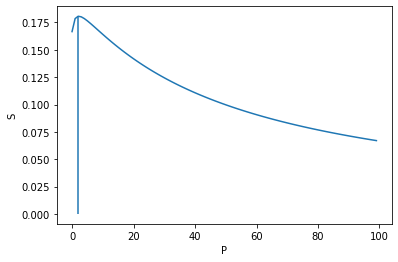

In [57]:
index=0
_= plt.plot(S[:,index])
_= plt.vlines(np.where(S[:,index]==maxim[index]),0,maxim[index])
_= plt.xlabel("P")
_= plt.ylabel("S")

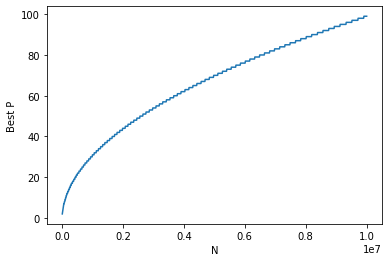

In [58]:
_=plt.plot(n,best_Ps)
_= plt.xlabel("N")
_= plt.ylabel("Best P")

array([   10000,    20000,    30000,    40000,    50000,    60000,
          70000,    80000,    90000,   100000,   110000,   120000,
         130000,   140000,   150000,   160000,   170000,   180000,
         190000,   200000,   210000,   220000,   230000,   240000,
         250000,   260000,   270000,   280000,   290000,   300000,
         310000,   320000,   330000,   340000,   350000,   360000,
         370000,   380000,   390000,   400000,   410000,   420000,
         430000,   440000,   450000,   460000,   470000,   480000,
         490000,   500000,   510000,   520000,   530000,   540000,
         550000,   560000,   570000,   580000,   590000,   600000,
         610000,   620000,   630000,   640000,   650000,   660000,
         670000,   680000,   690000,   700000,   710000,   720000,
         730000,   740000,   750000,   760000,   770000,   780000,
         790000,   800000,   810000,   820000,   830000,   840000,
         850000,   860000,   870000,   880000,   890000,   900